In [1]:
%matplotlib inline
import yt
import yt.units as unit
import matplotlib.pyplot as plt
import numpy as np
from yt.analysis_modules.halo_analysis.api import *
import seaborn as sb

In [2]:
sb.set_style("white")

In [3]:
def boxes(data,n_boxes, z_direction, sim_box = 100.):

    box_c = sim_box/n_boxes
    
    init = box_c/2.
    finish = sim_box - box_c/2.
    
    box_cq = data.quan(box_c, "code_length")
    
    y_centers = np.linspace(init, finish, n_boxes)
    x_centers = np.linspace(init, finish, n_boxes)

    #create first box
    box_grid = []
    for i in range(len(x_centers)):
        for j in range(len(y_centers)):

            center = data.arr([x_centers[i],y_centers[j], z_direction], "code_length")
            left = center - box_cq/2.
            right = center + box_cq/2.

            box = data.box(left_edge=left, right_edge=right)
            box_grid.append(box)
    return box_grid

In [4]:
#this will be for one z only 
def density(data, n_boxes, z_direction, sim_box=100.):

    box_s = sim_box/n_boxes

    grid = boxes(data, n_boxes, z_direction, sim_box)

    mass = grid[0]["particle_mass"]
    mass = mass[0]
    vol = box_s**3
    vol = data.quan(vol, "code_length")

    rho = []
    for i in range(len(grid)):
        np_grid = len(grid[i]["particle_position"]) #total number of particles per box
        rho.append((np_grid * mass)/vol)
    rho = np.array(rho)
    rho_mean = np.mean(rho,axis=0)

    delta_rho = rho / rho_mean
    return delta_rho

In [5]:
def E(omega_m, omega_de, redshift):
    arg = omega_m*(1.0 + redshift)**3 + omega_de
    return np.sqrt(arg)

In [6]:
def tau(d, redshift):
    omega_m = 0.308
    omega_dm = 0.692
    omega_b = 0.0484
    
    Gamma = 1 #s^-1
    T = 1.0 #K
    h = 0.678 #
    beta = 1.6
    
    evol = E(omega_m, omega_dm, redshift)
    
    tau = (1.41 * ((1.0 + redshift)**6) * ((omega_b*h**2)**2) * (d**beta)) / (T * h * evol * Gamma)
    
    return tau

In [7]:
ds = yt.GadgetDataset("snaps_cola_z2p500.0")

yt : [INFO     ] 2017-09-08 12:44:45,268 Calculating time from 2.857e-01 to be 8.278e+16 seconds
yt : [INFO     ] 2017-09-08 12:44:45,270 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2017-09-08 12:44:45,314 Parameters: current_time              = 8.27809646585e+16 s
yt : [INFO     ] 2017-09-08 12:44:45,314 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2017-09-08 12:44:45,315 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2017-09-08 12:44:45,317 Parameters: domain_right_edge         = [ 100.  100.  100.]
yt : [INFO     ] 2017-09-08 12:44:45,318 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2017-09-08 12:44:45,320 Parameters: current_redshift          = 2.5
yt : [INFO     ] 2017-09-08 12:44:45,321 Parameters: omega_lambda              = 0.692
yt : [INFO     ] 2017-09-08 12:44:45,322 Parameters: omega_matter              = 0.308
yt : [INFO     ] 2017-09-08 12:44:45,323 Parameters: hubble_constant           = 0.678


In [8]:
data = ds.all_data()

In [9]:
print data["particle_velocity_x"].in_units("kmcm/s") * np.sqrt(1.0/3.5)

yt : [INFO     ] 2017-09-08 12:44:45,360 Allocating for 1.678e+07 particles (index particle type 'all')
yt : [INFO     ] 2017-09-08 12:44:48,485 Identified 1.108e+06 octs
yt : [WARNING  ] 2017-09-08 12:44:48,486 Your Gadget-2 file may have extra columns or different precision! (55356448 file vs 64582484 computed)
yt : [WARNING  ] 2017-09-08 12:44:48,487 Your Gadget-2 file may have extra columns or different precision! (55317544 file vs 64537096 computed)
yt : [WARNING  ] 2017-09-08 12:44:48,488 Your Gadget-2 file may have extra columns or different precision! (46432096 file vs 54170740 computed)
yt : [WARNING  ] 2017-09-08 12:44:48,488 Your Gadget-2 file may have extra columns or different precision! (48203632 file vs 56237532 computed)
yt : [WARNING  ] 2017-09-08 12:44:48,489 Your Gadget-2 file may have extra columns or different precision! (47232400 file vs 55104428 computed)
yt : [WARNING  ] 2017-09-08 12:44:48,490 Your Gadget-2 file may have extra columns or different precision! (4

[ 284.66409302   98.28153992   21.86691856 ...,  405.84634399  379.15167236
  360.73126221] kmcm/s


In [10]:
print data["particle_velocity_x"]

[ 284.66409302   98.28153992   21.86691856 ...,  405.84634399  379.15167236
  360.73126221] code_velocity


In [11]:
n_box = 10.
box_size = 100. / n_box
z = np.linspace(box_size/2., 100.0 - box_size/2., n_box)

/Users/Oleg/Library/Python/2.7/lib/python/site-packages/ipykernel/__main__.py:3: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  app.launch_new_instance()


In [12]:
delta_grid = []
for i in range(len(z)):
    delta_grid.append(density(ds, n_box, z[i]))

/Users/Oleg/Library/Python/2.7/lib/python/site-packages/ipykernel/__main__.py:10: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
/Users/Oleg/Library/Python/2.7/lib/python/site-packages/ipykernel/__main__.py:11: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


In [13]:
print np.shape(delta_grid)

(10, 100)


In [14]:
grid_array = np.array(delta_grid)

In [15]:
grid_array = grid_array.reshape((int(n_box),int(n_box),int(n_box)))

In [16]:
print np.shape(grid_array)

(10, 10, 10)


In [17]:
bbox = np.array([[0.,100.],[0.,100.], [0.,100.]])

In [18]:
data_delta = dict(density = (grid_array, "code_density"))
ds_delta = yt.load_uniform_grid(data_delta, grid_array.shape, length_unit="code_length",
                               bbox = bbox, nprocs = 64)

yt : [INFO     ] 2017-09-08 12:48:01,177 Parameters: current_time              = 0.0
yt : [INFO     ] 2017-09-08 12:48:01,178 Parameters: domain_dimensions         = [10 10 10]
yt : [INFO     ] 2017-09-08 12:48:01,180 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2017-09-08 12:48:01,181 Parameters: domain_right_edge         = [ 100.  100.  100.]
yt : [INFO     ] 2017-09-08 12:48:01,182 Parameters: cosmological_simulation   = 0.0


yt : [INFO     ] 2017-09-08 12:48:01,518 xlim = 0.000000 100.000000
yt : [INFO     ] 2017-09-08 12:48:01,519 ylim = 0.000000 100.000000
yt : [INFO     ] 2017-09-08 12:48:01,521 xlim = 0.000000 100.000000
yt : [INFO     ] 2017-09-08 12:48:01,522 ylim = 0.000000 100.000000
yt : [INFO     ] 2017-09-08 12:48:01,524 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



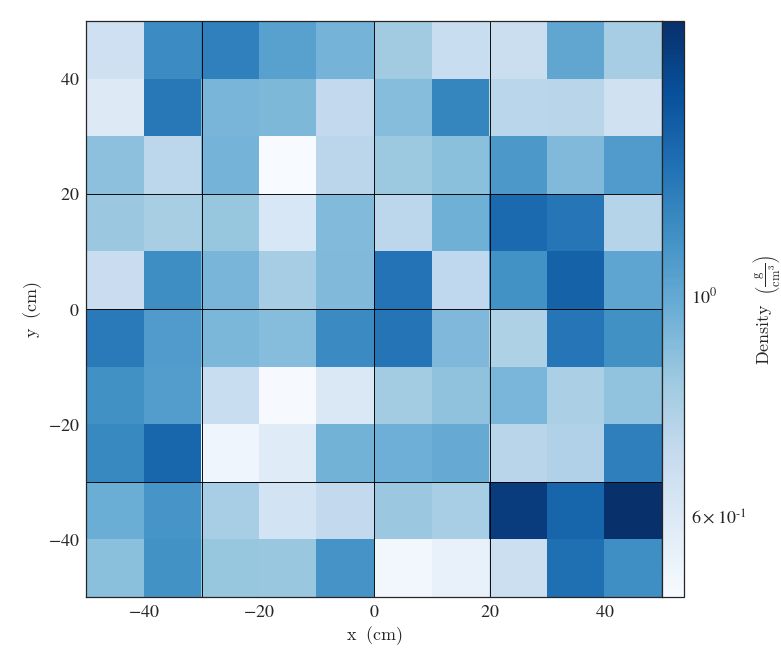

In [19]:
slc = yt.SlicePlot(ds_delta, "z", ["density"])
slc.set_cmap("density", "Blues")
slc.annotate_grids(cmap=None)
slc.show()

In [20]:
max_den = ds_delta.find_max("density")[1]
min_den = ds_delta.find_min("density")[1]

yt : [INFO     ] 2017-09-08 12:48:02,714 Max Value is 2.56339e+00 at 5.0000000000000000 15.0000000000000000 65.0000000000000000
yt : [INFO     ] 2017-09-08 12:48:02,733 Min Value is 2.98114e-01 at 45.0000000000000000 55.0000000000000000 35.0000000000000000


In [21]:
ray1 = ds_delta.ortho_ray(2, (max_den[0], max_den[1]))


In [22]:
srt1 = np.argsort(ray1['z'])


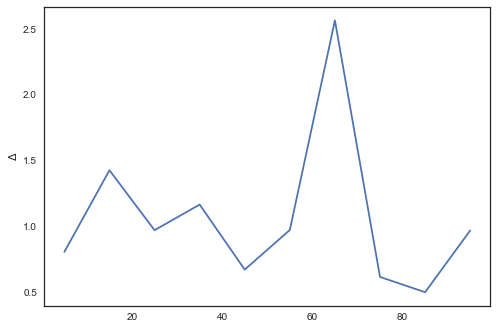

In [23]:
plt.plot(np.array(ray1['z'][srt1]), np.array(ray1['density'][srt1]));
plt.ylabel(r"$\Delta$");

In [24]:
print ray1['density'][srt1]

[ 0.80543021  1.4252407   0.96991216  1.16477245  0.67080682  0.97158701
  2.56338879  0.6150747   0.49899018  0.9680063 ] g/cm**3


In [25]:
small_delta = np.array(ray1['density'][srt1])

In [26]:
optic_depth = tau(small_delta, 2.5)

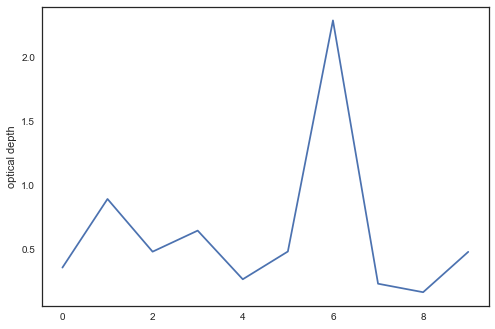

In [27]:
plt.plot(optic_depth);
plt.ylabel("optical depth");

In [28]:
F = np.exp(-1.0 * optic_depth)

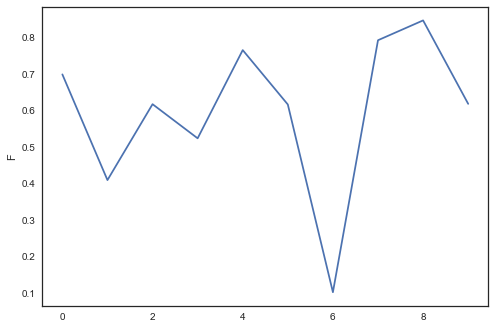

In [29]:
plt.plot(F);
plt.ylabel("F");

In [30]:
print np.shape(delta_grid)

(10, 100)


In [31]:
print np.shape(delta_grid[1])

(100,)


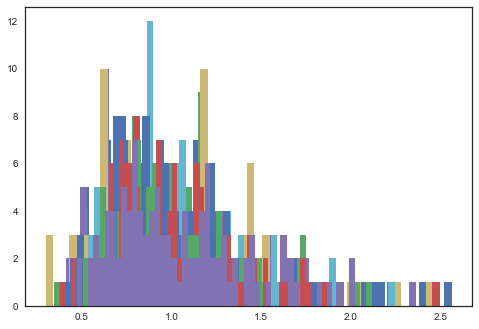

In [32]:
for i in range(10):
    plt.hist(delta_grid[i],bins=50);
plt.show()

np.savetxt("density_grid_100mpc.dat",delta_grid)

create a new grid_dict with the velocities

In [33]:
def velocity(data, n_boxes, z_direction, sim_box=100.):

    
    box_c = sim_box/n_boxes
    
    init = box_c/2.
    finish = sim_box - box_c/2.
    
    box_cq = data.quan(box_c, "code_length")
    
    y_centers = np.linspace(init, finish, n_boxes)
    x_centers = np.linspace(init, finish, n_boxes)

    #create first box
    box_grid = []
    for i in range(len(x_centers)):
        for j in range(len(y_centers)):

            center = data.arr([x_centers[i],y_centers[j], z_direction], "code_length")
            left = center - box_cq/2.
            right = center + box_cq/2.

            box = data.box(left_edge=left, right_edge=right)
            vel_z = np.mean(box["particle_velocity_z"])
            #vel = box.quantities.bulk_velocity(use_gas=False, use_particles=True)
            box_grid.append(vel_z)
    return box_grid

In [34]:
velocity_grid = []
for i in range(len(z)):
    val = velocity(ds, n_box, z[i])
    velocity_grid.append(val)

/Users/Oleg/Library/Python/2.7/lib/python/site-packages/ipykernel/__main__.py:11: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
/Users/Oleg/Library/Python/2.7/lib/python/site-packages/ipykernel/__main__.py:12: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


In [35]:
print np.shape(velocity_grid)

(10, 100)


In [36]:
print len(z)

10


In [37]:
np.savetxt("velocity_grid.dat",velocity_grid)

In [38]:
velocity_array = np.array(velocity_grid)

In [39]:
velocity_array = velocity_array.reshape((int(n_box),int(n_box),int(n_box)))

In [40]:
data_dv = dict(density = (grid_array, "code_density"),
              velocity_z = (velocity_array,"code_velocity"))
ds_dv = yt.load_uniform_grid(data_dv, grid_array.shape, length_unit="code_length",
                             velocity_unit="code_velocity",bbox = bbox, nprocs = 2)

yt : [INFO     ] 2017-09-08 12:51:13,512 Parameters: current_time              = 0.0
yt : [INFO     ] 2017-09-08 12:51:13,515 Parameters: domain_dimensions         = [10 10 10]
yt : [INFO     ] 2017-09-08 12:51:13,517 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2017-09-08 12:51:13,520 Parameters: domain_right_edge         = [ 100.  100.  100.]
yt : [INFO     ] 2017-09-08 12:51:13,523 Parameters: cosmological_simulation   = 0.0


In [41]:
ray2 = ds_dv.ortho_ray(2, (max_den[0], max_den[1]))
srt2 = np.argsort(ray2['z'])

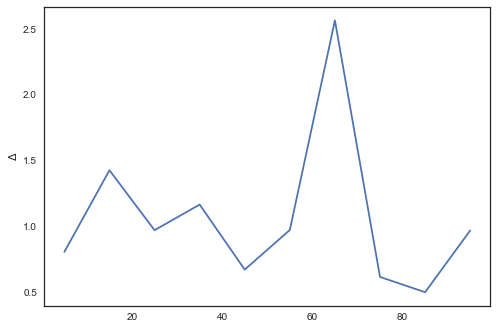

In [42]:
plt.plot(np.array(ray2['z'][srt1]), np.array(ray2['density'][srt1]));
plt.ylabel(r"$\Delta$")

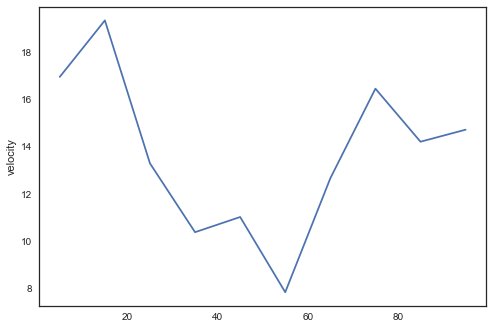

In [55]:
plt.plot(np.array(ray2['z'][srt1]), np.array(ray2['velocity_z'][srt1])*(3.5/100.));
plt.ylabel("velocity");

In [44]:
data_dv = ds_dv.all_data()

In [45]:
print np.shape(data_dv["density"])

(1000,)


In [46]:
gamma = 0.4 / 0.7
temp_grid = []
for i in range(len(z)):
    T = density(ds, n_box, z[i])**gamma
    temp_grid.append(T)

/Users/Oleg/Library/Python/2.7/lib/python/site-packages/ipykernel/__main__.py:10: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
/Users/Oleg/Library/Python/2.7/lib/python/site-packages/ipykernel/__main__.py:11: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


In [47]:
print np.shape(temp_grid)

(10, 100)


np.savetxt("temperatur.dat",temp_grid)

In [48]:
temp_array = np.array(temp_grid)

In [49]:
temp_array = temp_array.reshape((int(n_box),int(n_box),int(n_box)))

In [50]:
data_dvt = dict(density = (grid_array, "code_density"),
              velocity_z = (velocity_array,"code_velocity"),
               temperature = (temp_array, "code_temperature"))
ds_dvt = yt.load_uniform_grid(data_dvt, grid_array.shape, length_unit="code_length",
                             velocity_unit="code_velocity",bbox = bbox, nprocs = 3)

yt : [INFO     ] 2017-09-08 12:54:36,663 Parameters: current_time              = 0.0
yt : [INFO     ] 2017-09-08 12:54:36,664 Parameters: domain_dimensions         = [10 10 10]
yt : [INFO     ] 2017-09-08 12:54:36,666 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2017-09-08 12:54:36,669 Parameters: domain_right_edge         = [ 100.  100.  100.]
yt : [INFO     ] 2017-09-08 12:54:36,672 Parameters: cosmological_simulation   = 0.0


In [51]:
ray3 = ds_dvt.ortho_ray(2, (max_den[0], max_den[1]))

In [52]:
srt3 = np.argsort(ray3['z'])

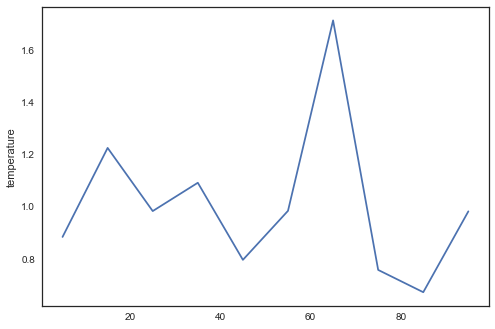

In [53]:
plt.plot(np.array(ray3['z'][srt3]), np.array(ray3['temperature'][srt3]));
plt.ylabel("temperature");